--------------------------------Machine Learning Regression Model------------------------------------------------------

Importing Necessary Libraries

In [23]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

Loading Training and Testing Datasets

In [24]:

train_data = pd.read_csv("train_data.csv",names=["f1", "f2", "target"])
test_data = pd.read_csv("test_data.csv",names=["f1", "f2", "target"])

Splitting the Datas for Training and Testing

In [25]:
#Training datasets
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
#Testing datasets
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

Feature Scaling

In [26]:
#Using StandardScalar,the Features are Preprocessed
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 Function for fitting different models

In [27]:

def linear_models(model):
    mod=model.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mae= mean_absolute_error(y_test,y_pred)
    return mse,mae

In [28]:
#List of MAE and MSE for plotting graph
MSE=[]
MAE=[]
#Model list
model_list=[SVR(kernel="linear",C=1.0),LinearRegression()]
model_name_list=["Support Vector Regression","Linear Regression"]
print("                                    Evaluation Metrics")
for model,model_name in zip(model_list,model_name_list):
    mse,mae=linear_models(model)
    MSE.append(mse)
    MAE.append(mae)
    print(f"{model_name}:")
    print("   Mean Squared Error=",round(mse,3))
    print("   Mean Absolute Error=",round(mae,3))
    print("-------------------------------------------------------------------------------------------------------------------------")

                                    Evaluation Metrics
Support Vector Regression:
   Mean Squared Error= 5.045
   Mean Absolute Error= 1.799
-------------------------------------------------------------------------------------------------------------------------
Linear Regression:
   Mean Squared Error= 5.046
   Mean Absolute Error= 1.799
-------------------------------------------------------------------------------------------------------------------------


Plotting Graph

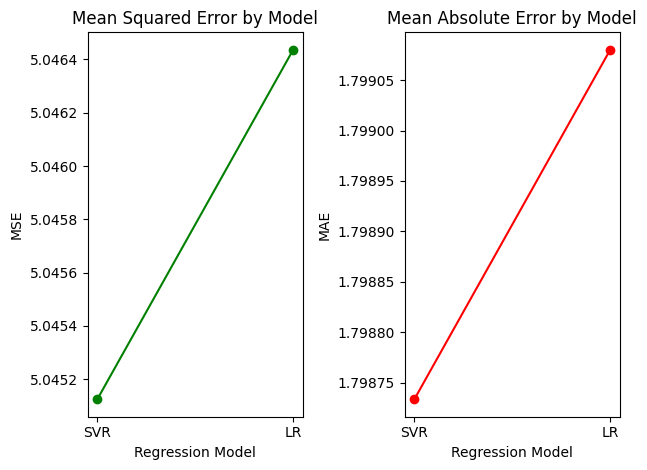

In [29]:
#MSE graph
plt.subplot(1,2,1)
plt.plot(["SVR","LR"],MSE,c="g",marker="o")
plt.title("Mean Squared Error by Model")
plt.xlabel("Regression Model")
plt.ylabel("MSE")
#MAE graph
plt.subplot(1,2,2)
plt.plot(["SVR","LR"],MAE,c="r",marker="o")
plt.title("Mean Absolute Error by Model")
plt.xlabel("Regression Model")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()